In [1]:
using Revise
using QuantumOptics
using LaTeXStrings
import PyPlot
import StochasticDiffEq
const plt = PyPlot

‚îå Info: Precompiling PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
‚îî @ Base loading.jl:1273
‚îå Warning: Module Conda with build ID 3077367470043487 is missing from the cache.
‚îÇ This may mean Conda [8f4d0f93-b110-5947-807f-2305c1781a2d] does not support precompilation but is imported by a module that does.
‚îî @ Base loading.jl:1011
‚îå Warning: Module Conda with build ID 3077367470043487 is missing from the cache.
‚îÇ This may mean Conda [8f4d0f93-b110-5947-807f-2305c1781a2d] does not support precompilation but is imported by a module that does.
‚îî @ Base loading.jl:1011
‚îå Info: Skipping precompilation since __precompile__(false). Importing PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee].
‚îî @ Base loading.jl:1028
‚îå Info: Precompiling PyCall [438e738f-606a-5dbb-bf0a-cddfbfd45ab0]
‚îî @ Base loading.jl:1273
‚îå Warning: Module Conda with build ID 3077367470043487 is missing from the cache.
‚îÇ This may mean Conda [8f4d0f93-b110-5947-807f-2305c1781a2d] does not support precomp

PyPlot

In [2]:
# set some plot configs
plt.matplotlib.rc("xtick", top=false)
plt.matplotlib.rc("ytick", right=false, left=false)
plt.matplotlib.rc("axes", labelsize=20, titlesize=20, grid=true)
plt.matplotlib.rc("axes", linewidth=2)
plt.matplotlib.rc("grid", alpha=0.25, linestyle="--")
plt.matplotlib.rc("font", family="Palatino", weight="medium")
plt.matplotlib.rc("figure", figsize=(8,4))
plt.matplotlib.rc("xtick.major", width=2)
plt.matplotlib.rc("ytick.major", width=2)

In [3]:
# construct bases
sb = SpinBasis(1//2)
vb = FockBasis(10)
cb = sb ‚äó vb;

In [4]:
# Electronic ground state in Y-basis
œàg = (1/‚àö2) * (spindown(sb) - im*spinup(sb))
# Electronic excited state in Y-basis
œàe = (1/‚àö2) * (spindown(sb) + im*spinup(sb))
# Inital state
œài = œàg ‚äó fockstate(vb, 0);

In [5]:
# Bare rotated-basis, single-ion, VAET Hamiltonian
H(J, Œî, Œ∫, ŒΩ) = 2œÄ * J/2 * sigmax(sb) ‚äó one(vb) + 2œÄ * Œî/2 * sigmay(sb) ‚äó one(vb) + 2œÄ * Œ∫/2 * sigmay(sb) ‚äó (create(vb) + destroy(vb)) + 2œÄ * ŒΩ * one(sb) ‚äó number(vb)

H (generic function with 1 method)

In [528]:
# Measurement function
fout(t, œà) = expect((œàe ‚äó œàe') ‚äó one(vb), œà)

fout (generic function with 1 method)

# Master Equation

In [7]:
# œÉy noise operator for use with Lindblad master equation
J(Œì) = [‚àö(2œÄ * Œì) * sigmay(sb) ‚äó one(vb)]

J (generic function with 1 method)

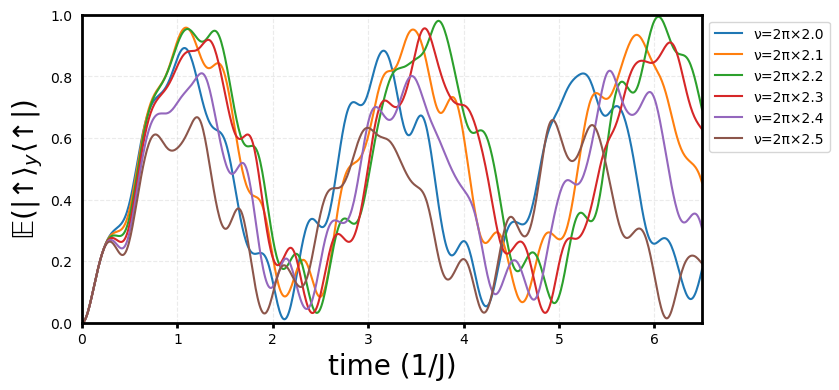

In [178]:
# Look at coherent VAET dynamics for different VAET detunings
for ŒΩ in range(2, stop=2.5, length=6)
    tout, sol = timeevolution.schroedinger(collect(0:0.01:6.5), œài, H(1, 2, 1, ŒΩ), fout=fout)
    plt.plot(tout, sol, label="ŒΩ=2œÄ√ó$ŒΩ")
end
plt.ylim(0, 1)
plt.xlim(tout[1], tout[end])
plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel("time (1/J)")
plt.ylabel(L"ùîº(|‚Üë‚ü©_y‚ü®‚Üë|)")
plt.show()

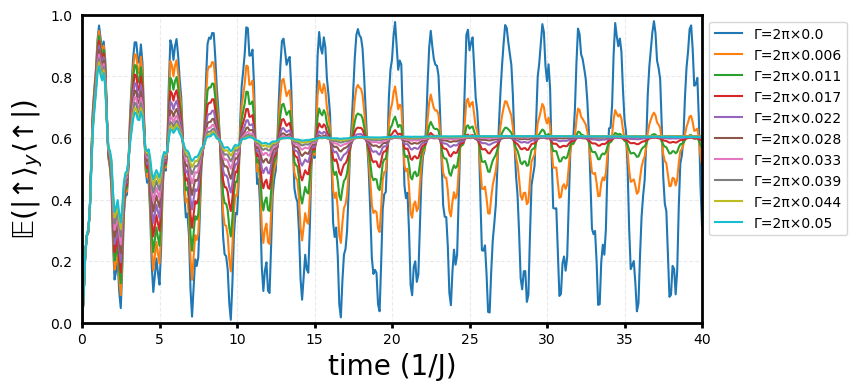

In [206]:
# Look at VAET dynamics for various white noise strengths
for Œì in range(0, stop=0.05, length=10)
    tout, sol = timeevolution.master(collect(0:0.1:40), œài, H(1, 2, 1, 2.15), J(Œì), fout=fout, reltol=1e-9, abstol=1e-8)
    plt.plot(tout, sol, label="Œì=2œÄ√ó$(round(Œì,digits=3))")
end
plt.ylim(0, 1)
plt.xlim(tout[1], tout[end])
plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel("time (1/J)")
plt.ylabel(L"ùîº(|‚Üë‚ü©_y‚ü®‚Üë|)")
plt.show()

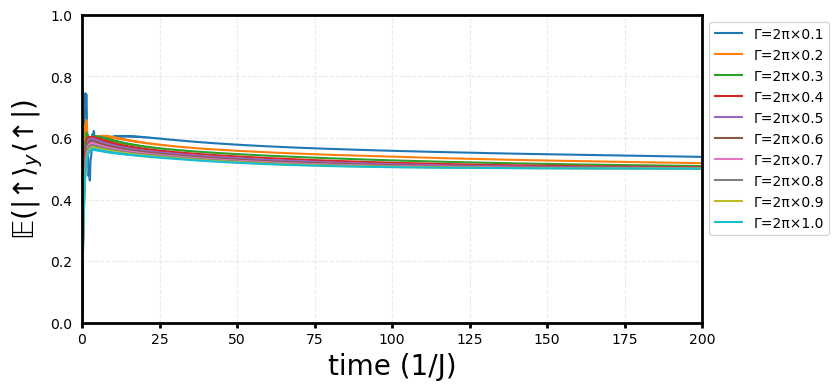

In [306]:
# Look at VAET dynamics for various white noise strengths at long run times
for Œì in range(0.1, stop=1, length=10)
    tout, sol = timeevolution.master(collect(0:0.1:200), œài, H(1, 2, 1, 2.15), J(Œì), fout=fout)
    plt.plot(tout, sol, label="Œì=2œÄ√ó$(round(Œì,digits=3))")
end
plt.ylim(0, 1)
plt.xlim(tout[1], tout[end])
plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel("time (1/J)")
plt.ylabel(L"ùîº(|‚Üë‚ü©_y‚ü®‚Üë|)")
plt.show()

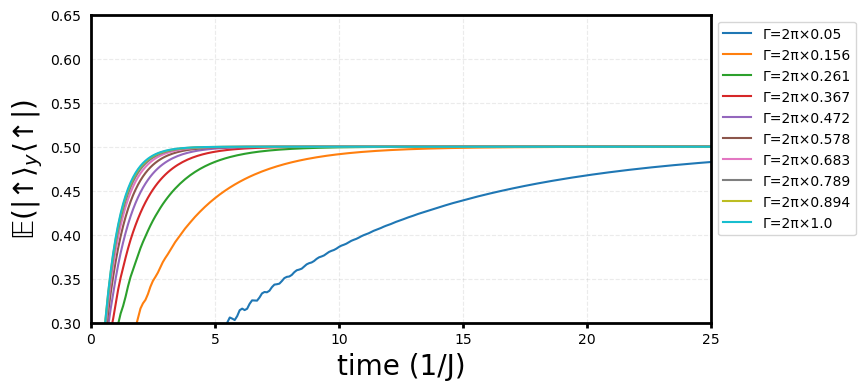

In [277]:
# demonstration of ENAQT phenomena
for Œì in range(0.05, stop=1, length=10)
    tout, sol = timeevolution.master(collect(0:0.1:25), œài, H(1, 2, 0, 2.15), J(Œì), fout=fout)
    plt.plot(tout, sol, label="Œì=2œÄ√ó$(round(Œì,digits=3))")
end
plt.ylim(0.3, 0.65)
plt.xlim(tout[1], tout[end])
plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel("time (1/J)")
plt.ylabel(L"ùîº(|‚Üë‚ü©_y‚ü®‚Üë|)")
plt.show()

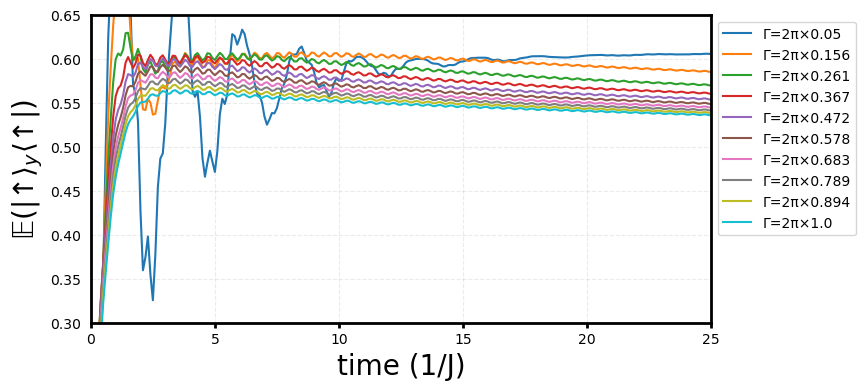

In [278]:
# ENAQT and resonant VAET are not compatible here
for Œì in range(0.05, stop=1, length=10)
    tout, sol = timeevolution.master(collect(0:0.1:25), œài, H(1, 2, 1, 2.15), J(Œì), fout=fout)
    plt.plot(tout, sol, label="Œì=2œÄ√ó$(round(Œì,digits=3))")
end
plt.ylim(0.3, 0.65)
plt.xlim(tout[1], tout[end])
plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel("time (1/J)")
plt.ylabel(L"ùîº(|‚Üë‚ü©_y‚ü®‚Üë|)")
plt.show()

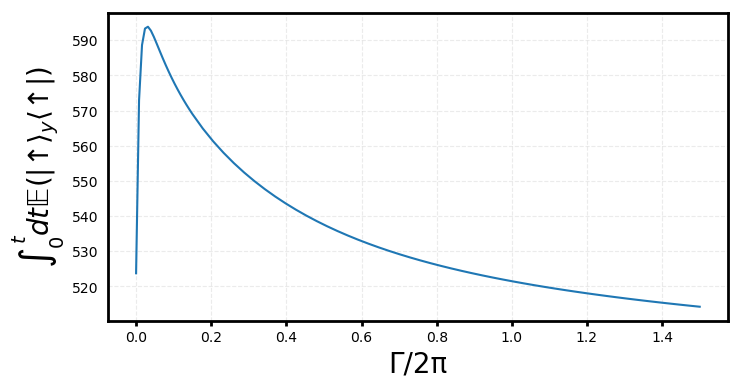

In [304]:
# integrated excited state population for a resonant VAET interaction as a function of white noise strength
Œìlist = [range(0, stop=0.15, length=20); range(0.15, stop=1.5, length=50)]
intpop = []
for Œì in Œìlist
    _, sol = timeevolution.master(collect(0:0.1:100), œài, H(1, 2, 1, 2.15), J(Œì), fout=fout)
    push!(intpop, sum(real.(sol)))
end
plt.plot(Œìlist, intpop)
plt.xlabel("Œì/2œÄ")
plt.ylabel(L"\int_0^t dt ùîº(|‚Üë‚ü©_y‚ü®‚Üë|)")
plt.show()

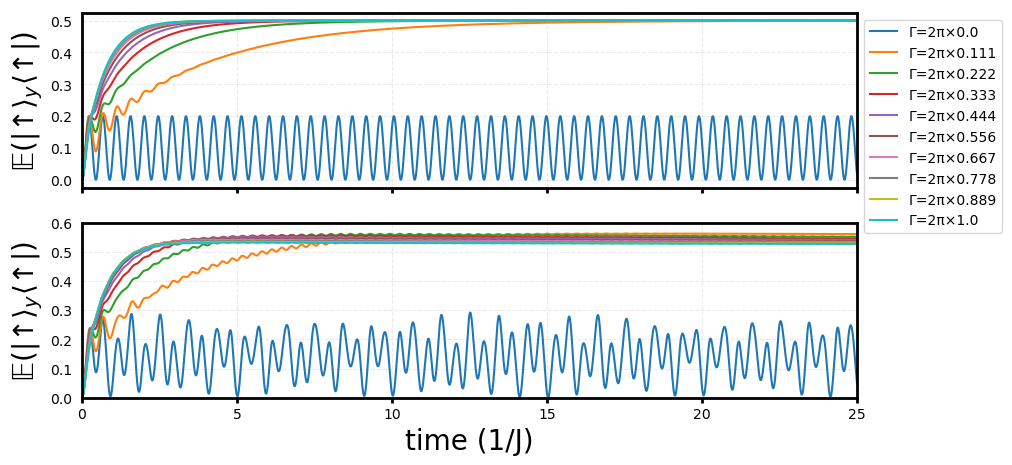

In [500]:
# What about ENAQT and detuend VAET?
fig, ax = plt.subplots(2, 1, sharex=true, figsize=(10,5))
for Œì in range(0, stop=1, length=10)
    tout, sol = timeevolution.master(collect(0:0.01:25), œài, H(1, 2, 1, 3.15), J(Œì), fout=fout)
    tout, sol1 = timeevolution.master(collect(0:0.01:25), œài, H(1, 2, 0, 3.15), J(Œì), fout=fout)
    ax[2,1].plot(tout, sol, label="Œì=2œÄ√ó$(round(Œì,digits=3))")
    ax[1,1].plot(tout, sol1, label="Œì=2œÄ√ó$(round(Œì,digits=3))")
end
plt.ylim(0, 0.6)
plt.xlim(tout[1], tout[end])
ax[1,1].legend(bbox_to_anchor=(1, 1))
plt.xlabel("time (1/J)")
ax[1,1].set_ylabel(L"ùîº(|‚Üë‚ü©_y‚ü®‚Üë|)")
plt.ylabel(L"ùîº(|‚Üë‚ü©_y‚ü®‚Üë|)")
plt.show()

# Stochastic Schroedinger Equation

In [317]:
# Stochastic term for Hamitonian
Hs(Œ¥Œî) = (sqrt(2œÄ * Œ¥Œî) / 2) * sigmay(sb) ‚äó one(vb) 

Hs (generic function with 1 method)

In [419]:
Ntraj = 250
tspan = 0:0.1:40
y_avg1 = zero(tspan)
y_avg2 = zero(tspan)
y_avg3 = zero(tspan)
for i in 1:Ntraj
    t, y1 = stochastic.schroedinger(tspan, œài, H(1, 2, 1, 2.15), Hs(0.01), fout=fout, dt=1e-5, normalize_state=true)
    t, y2 = stochastic.schroedinger(tspan, œài, H(1, 2, 1, 2.15), Hs(0.05), fout=fout, dt=1e-5, normalize_state=true)
    t, y3 = stochastic.schroedinger(tspan, œài, H(1, 2, 1, 2.15), Hs(0.1), fout=fout, dt=1e-5, normalize_state=true)
    y_avg1 .+= real.(y1)./Ntraj
    y_avg2 .+= real.(y2)./Ntraj
    y_avg3 .+= real.(y3)./Ntraj
end

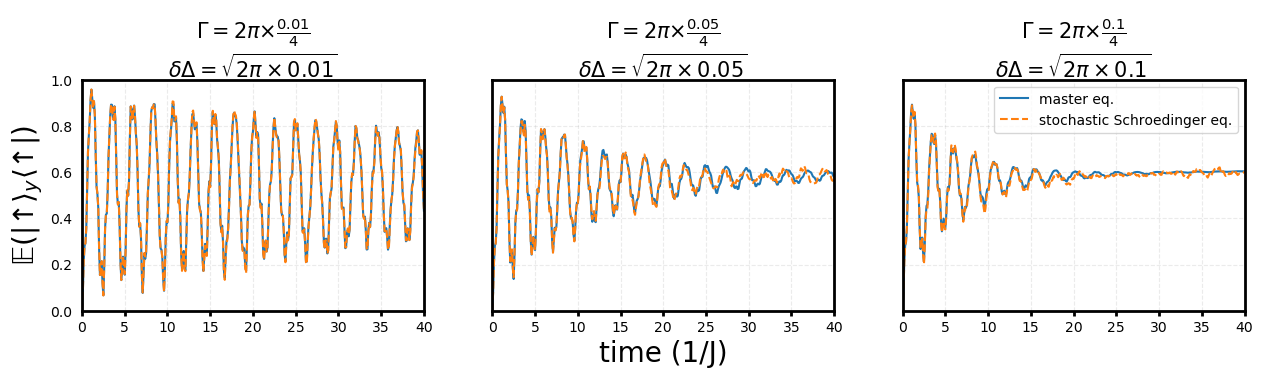

In [436]:
tout, sol1 = timeevolution.master(collect(0:0.1:40), œài, H(1, 2, 1, 2.15), J(0.01/4), fout=fout, reltol=1e-9, abstol=1e-8)
tout, sol2 = timeevolution.master(collect(0:0.1:40), œài, H(1, 2, 1, 2.15), J(0.05/4), fout=fout, reltol=1e-9, abstol=1e-8)
tout, sol3 = timeevolution.master(collect(0:0.1:40), œài, H(1, 2, 1, 2.15), J(0.1/4), fout=fout, reltol=1e-9, abstol=1e-8)
fig, ax = plt.subplots(1, 3, sharey=true, figsize=(15,3))
ax[1,1].plot(tout, sol1)
ax[1,1].plot(tspan, y_avg1, ls="--")
ax[2,1].plot(tout, sol2)
ax[2,1].plot(tspan, y_avg2, ls="--")
ax[3,1].plot(tout, sol3, label="master eq.")
ax[3,1].plot(tspan, y_avg3, ls="--", label="stochastic Schroedinger eq.")
ax[1,1].set_title(L"Œì = 2œÄ √ó \frac{0.01}{4}" * "\n" * L"Œ¥Œî = \sqrt{2œÄ \times 0.01}", fontsize=15)
ax[2,1].set_title(L"Œì = 2œÄ √ó \frac{0.05}{4}" * "\n" * L"Œ¥Œî = \sqrt{2\pi \times 0.05}", fontsize=15)
ax[3,1].set_title(L"Œì = 2œÄ √ó \frac{0.1}{4}" * "\n" * L"Œ¥Œî = \sqrt{2\pi \times 0.1}", fontsize=15)
ax[1,1].set_ylabel(L"ùîº(|‚Üë‚ü©_y‚ü®‚Üë|)")
ax[2,1].set_xlabel("time (1/J)")
ax[1,1].set_ylim(0, 1); ax[2,1].set_ylim(0, 1); ax[3,1].set_ylim(0, 1)
ax[1,1].set_xlim(tout[1], tout[end]); ax[2,1].set_xlim(tout[1], tout[end]); ax[3,1].set_xlim(tout[1], tout[end])
ax[3,1].legend()
plt.show()

In [465]:
# Effect on Rabi Oscillations
HR = 2œÄ/2 * sigmax(sb)
HsR(Œ¥) = (sqrt(2œÄ * Œ¥) / 2) * sigmax(sb)
JR(Œì) = [‚àö(2œÄ * Œì) * sigmay(sb)]
foutR(t,psi) = expect(dm(spinup(sb)), psi)
Ntraj = 250
tspan = 0:0.1:40
y_avgR1 = zero(tspan)
y_avgR2 = zero(tspan)
y_avgR3 = zero(tspan)
for i in 1:Ntraj
    t, y1 = stochastic.schroedinger(tspan, spindown(sb), HR, HsR(0.01), fout=foutR, dt=1e-5, normalize_state=true)
    t, y2 = stochastic.schroedinger(tspan, spindown(sb), HR, HsR(0.05), fout=foutR, dt=1e-5, normalize_state=true)
    t, y3 = stochastic.schroedinger(tspan, spindown(sb), HR, HsR(0.1), fout=foutR, dt=1e-5, normalize_state=true)
    y_avgR1 .+= real.(y1)./Ntraj
    y_avgR2 .+= real.(y2)./Ntraj
    y_avgR3 .+= real.(y3)./Ntraj
end

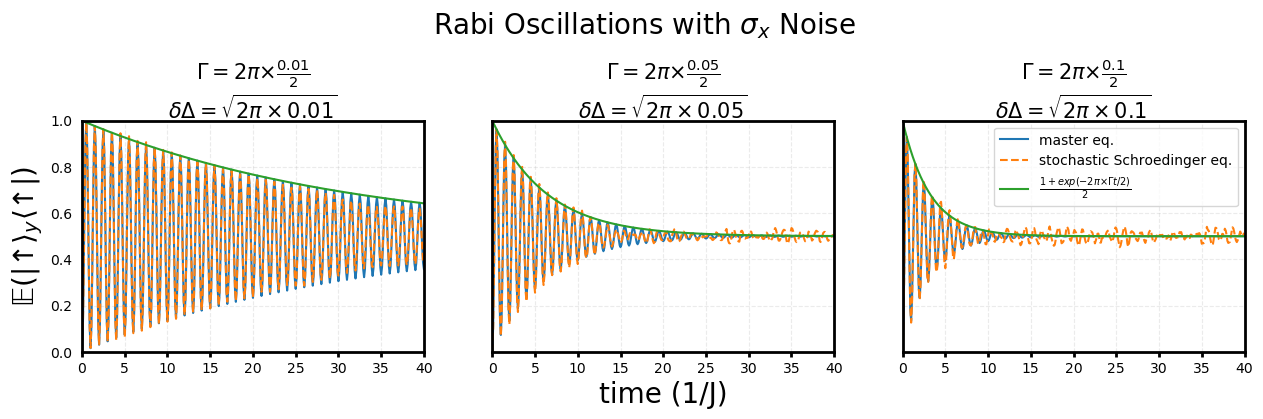

In [501]:
tout, sol1R = timeevolution.master(collect(0:0.1:40), spindown(sb), HR, JR(0.01/2), fout=foutR)
tout, sol2R = timeevolution.master(collect(0:0.1:40), spindown(sb), HR, JR(0.05/2), fout=foutR)
tout, sol3R = timeevolution.master(collect(0:0.1:40), spindown(sb), HR, JR(0.1/2), fout=foutR)
fig, ax = plt.subplots(1, 3, sharey=true, figsize=(15,3))
ax[1,1].plot(tout, sol1R)
ax[1,1].plot(tspan, y_avgR1, ls="--")
ax[1,1].plot(tspan, @.(0.5 + 0.5exp(-2œÄ * 0.01/2 * tspan)))
ax[2,1].plot(tout, sol2R)
ax[2,1].plot(tspan, y_avgR2, ls="--")
ax[2,1].plot(tspan, @.(0.5 + 0.5exp(-2œÄ * 0.05/2 * tspan)))
ax[3,1].plot(tout, sol3R, label="master eq.")
ax[3,1].plot(tspan, y_avgR3, ls="--", label="stochastic Schroedinger eq.")
ax[3,1].plot(tspan, @.(0.5 + 0.5exp(-2œÄ * 0.1/2 * tspan)), label=L"\frac{1 + exp(-2œÄ√óŒìt/2)}{2}")
ax[1,1].set_title(L"Œì = 2œÄ √ó \frac{0.01}{2}" * "\n" * L"Œ¥Œî = \sqrt{2œÄ \times 0.01}", fontsize=15)
ax[2,1].set_title(L"Œì = 2œÄ √ó \frac{0.05}{2}" * "\n" * L"Œ¥Œî = \sqrt{2\pi \times 0.05}", fontsize=15)
ax[3,1].set_title(L"Œì = 2œÄ √ó \frac{0.1}{2}" * "\n" * L"Œ¥Œî = \sqrt{2\pi \times 0.1}", fontsize=15)
ax[1,1].set_ylabel(L"ùîº(|‚Üë‚ü©_y‚ü®‚Üë|)")
ax[2,1].set_xlabel("time (1/J)")
ax[1,1].set_ylim(0, 1); ax[2,1].set_ylim(0, 1); ax[3,1].set_ylim(0, 1)
ax[1,1].set_xlim(tout[1], tout[end]); ax[2,1].set_xlim(tout[1], tout[end]); ax[3,1].set_xlim(tout[1], tout[end])
ax[3,1].legend()
plt.suptitle(L"Rabi Oscillations with $\sigma_x$ Noise", y=1.25, fontsize=20)
plt.show()

# Lorentzian Noise

In [399]:
Nc = 10
Œ∫ = 1.0
n = 4
Œî = 5.0Œ∫

basis = FockBasis(Nc)
a = destroy(basis)
Ht = -Œî*dagger(a)*a
Jt = [sqrt(2Œ∫)*dagger(a)*a]

œÅ‚ÇÄ = fockstate(basis, n) ‚äó dagger(fockstate(basis, n))

dœÑ = 0.001
œÑmax = 1000
œÑ = [0:dœÑ:œÑmax;]
corr = timecorrelations.correlation(œÑ, œÅ‚ÇÄ, Ht, Jt, dagger(a), a);

In [400]:
œâ, spec = timecorrelations.correlation2spectrum(œÑ, corr; normalize_spec=true);

In [401]:
corr_an = n.*exp.(-1.0im*Œî.*œÑ).*exp.(-Œ∫.*œÑ)
spec_an = 2n*Œ∫./((Œî .+ œâ).^2 .+ Œ∫^2)
spec_an ./= maximum(spec_an);

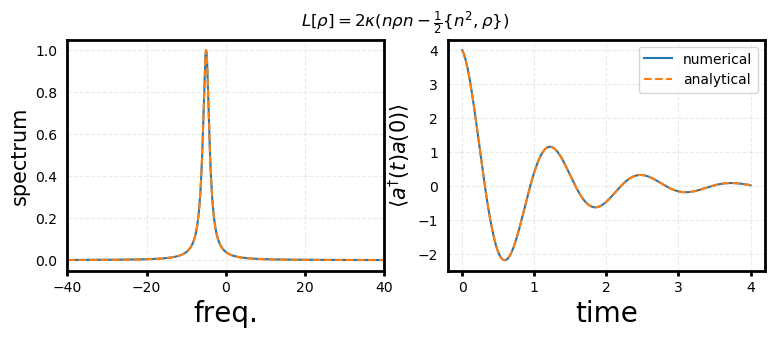

PyObject Text(0.5, 0.98, '$L[œÅ] = 2Œ∫(nœÅn - \\frac{1}{2}\\{n^2, œÅ\\})$')

In [402]:
plt.figure(figsize=(9, 3))
plt.subplot(121)
plt.plot(œâ, spec)
plt.plot(œâ, spec_an, ls="dashed")
plt.xlim(-40, 40)
plt.xlabel("freq.")
plt.ylabel("spectrum", fontsize=15)
plt.subplot(122)
plt.plot(œÑ[1:4000], real(corr[1:4000]), label="numerical")
plt.plot(œÑ[1:4000], real(corr_an[1:4000]), ls="dashed", label="analytical")
plt.xlabel("time")
plt.ylabel(L"‚ü®a^{\dagger}(t)a(0)‚ü©", fontsize=15)
plt.legend()
plt.suptitle(L"L[œÅ] = 2Œ∫(nœÅn - \frac{1}{2}\{n^2, œÅ\})")

In [475]:
Jm(Œ≥) = [‚àö(2œÄ*Œ≥) * one(sb) ‚äó number(vb)];

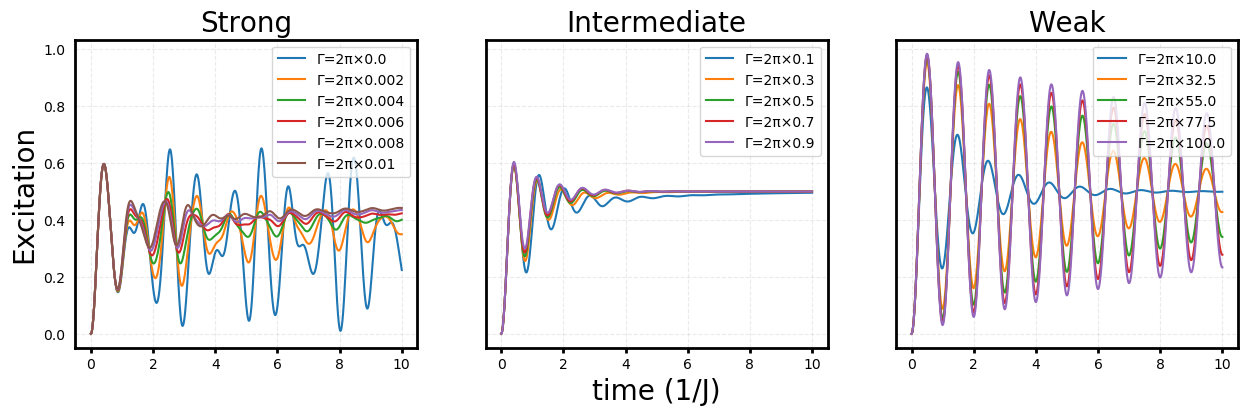

PyObject <matplotlib.legend.Legend object at 0x213cebd90>

In [502]:
fig, ax = plt.subplots(1,3, figsize=(15,4), sharey=true)
for Œ≥ in 0:0.002:0.01
    tout, sol = timeevolution.master(collect(0:0.01:10), œài, H(1, 0, 1, 0), Jm(Œ≥), fout=fout);
    ax[1,1].plot(tout, sol, label="Œì=2œÄ√ó$Œ≥")
end
for Œ≥ in 0.1:0.2:1
    tout, sol = timeevolution.master(collect(0:0.01:10), œài, H(1, 0, 1, 0), Jm(Œ≥), fout=fout);
    ax[2,1].plot(tout, sol, label="Œì=2œÄ√ó$Œ≥")
end
for Œ≥ in range(10, stop=100, length=5)
    tout, sol = timeevolution.master(collect(0:0.01:10), œài, H(1, 0, 1, 0), Jm(Œ≥), fout=fout);
    ax[3,1].plot(tout, sol, label="Œì=2œÄ√ó$(round(Œ≥,digits=3))")
end
ax[1,1].set_title("Strong")
ax[2,1].set_title("Intermediate")
ax[3,1].set_title("Weak")
ax[1,1].set_ylabel("Excitation")
ax[2,1].set_xlabel("time (1/J)")
ax[1,1].legend(loc=1)
ax[2,1].legend(loc=1)
ax[3,1].legend(loc=1)

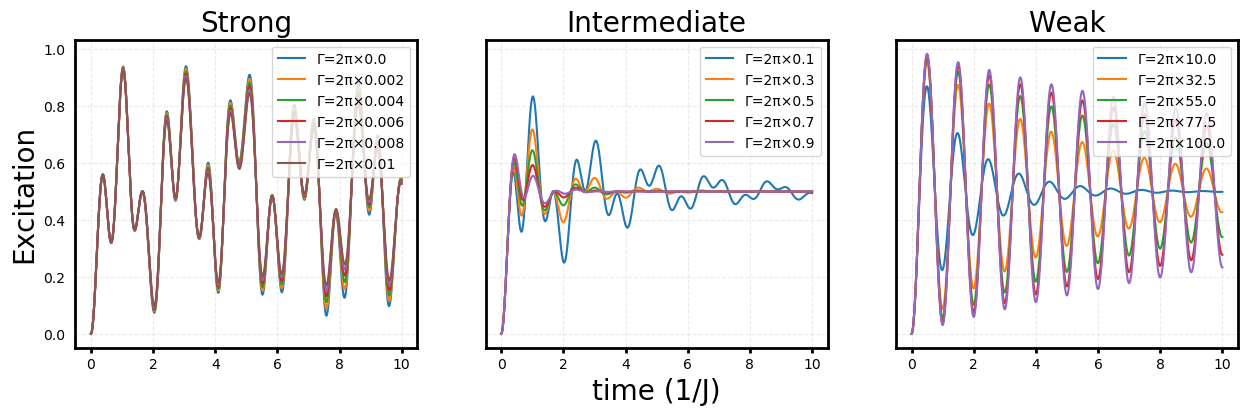

PyObject <matplotlib.legend.Legend object at 0x214d023d0>

In [500]:
fig, ax = plt.subplots(1,3, figsize=(15,4), sharey=true)
for Œ≥ in 0:0.002:0.01
    tout, sol = timeevolution.master(collect(0:0.01:10), œài, H(1, 0, 1, 1), Jm(Œ≥), fout=fout);
    ax[1,1].plot(tout, sol, label="Œì=2œÄ√ó$Œ≥")
end
for Œ≥ in 0.1:0.2:1
    tout, sol = timeevolution.master(collect(0:0.01:10), œài, H(1, 0, 1, 1), Jm(Œ≥), fout=fout);
    ax[2,1].plot(tout, sol, label="Œì=2œÄ√ó$Œ≥")
end
for Œ≥ in range(10, stop=100, length=5)
    tout, sol = timeevolution.master(collect(0:0.01:10), œài, H(1, 0, 1, 1), Jm(Œ≥), fout=fout);
    ax[3,1].plot(tout, sol, label="Œì=2œÄ√ó$(round(Œ≥,digits=3))")
end
ax[1,1].set_title("Strong")
ax[2,1].set_title("Intermediate")
ax[3,1].set_title("Weak")
ax[1,1].set_ylabel("Excitation")
ax[2,1].set_xlabel("time (1/J)")
ax[1,1].legend(loc=1)
ax[2,1].legend(loc=1)
ax[3,1].legend(loc=1)

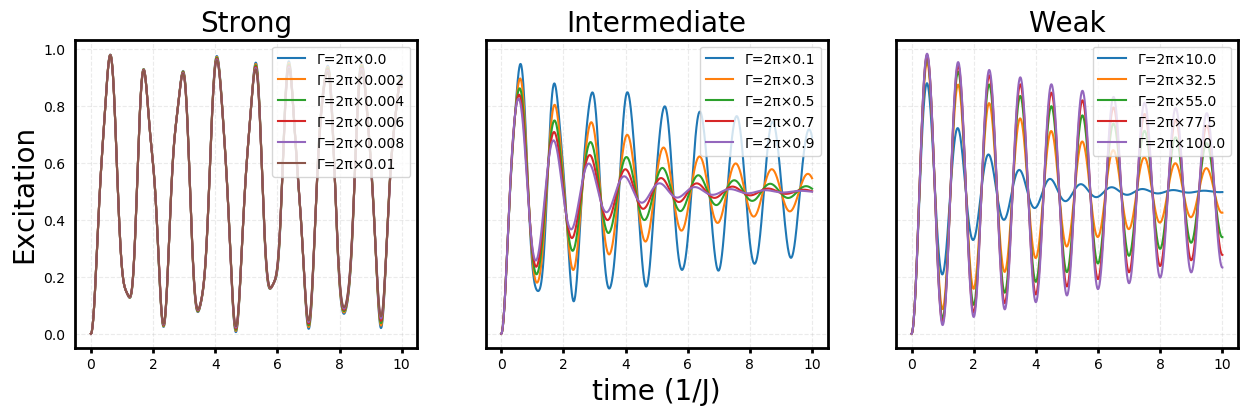

PyObject <matplotlib.legend.Legend object at 0x213c24190>

In [501]:
fig, ax = plt.subplots(1,3, figsize=(15,4), sharey=true)
for Œ≥ in 0:0.002:0.01
    tout, sol = timeevolution.master(collect(0:0.01:10), œài, H(1, 0, 1, 2), Jm(Œ≥), fout=fout);
    ax[1,1].plot(tout, sol, label="Œì=2œÄ√ó$Œ≥")
end
for Œ≥ in 0.1:0.2:1
    tout, sol = timeevolution.master(collect(0:0.01:10), œài, H(1, 0, 1, 2), Jm(Œ≥), fout=fout);
    ax[2,1].plot(tout, sol, label="Œì=2œÄ√ó$Œ≥")
end
for Œ≥ in range(10, stop=100, length=5)
    tout, sol = timeevolution.master(collect(0:0.01:10), œài, H(1, 0, 1, 2), Jm(Œ≥), fout=fout);
    ax[3,1].plot(tout, sol, label="Œì=2œÄ√ó$(round(Œ≥,digits=3))")
end
ax[1,1].set_title("Strong")
ax[2,1].set_title("Intermediate")
ax[3,1].set_title("Weak")
ax[1,1].set_ylabel("Excitation")
ax[2,1].set_xlabel("time (1/J)")
ax[1,1].legend(loc=1)
ax[2,1].legend(loc=1)
ax[3,1].legend(loc=1)

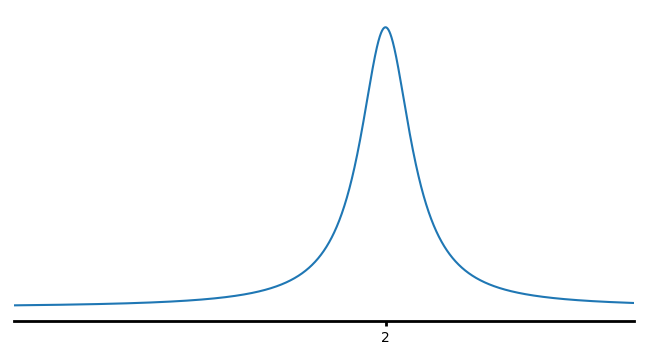

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.axis.XTick object at 0x213c69a50>

In [515]:
Œî=-2
spec_an = 2n*Œ∫./((Œî .+ œâ).^2 .+ Œ∫^2)
fig, ax = plt.subplots()
ax.plot(œâ, spec_an)
ax.set_xlim(-10,10)
plt.grid(false)
ax.spines["right"].set_visible(false)
ax.spines["top"].set_visible(false)
ax.spines["left"].set_visible(false)
ax.set_yticklabels([])
ax.set_xticks([2])

In [526]:
H(J, Œî, Œ∫, ŒΩ, Œ∫2, ŒΩ2) = (2œÄ * J/2 * sigmax(sb) ‚äó one(vb) ‚äó one(vb) + 
                         2œÄ * Œî/2 * sigmay(sb) ‚äó one(vb) ‚äó one(vb) + 
                         2œÄ * Œ∫/2 * sigmay(sb) ‚äó (create(vb) + destroy(vb)) ‚äó one(vb) + 
                         2œÄ * ŒΩ * one(sb) ‚äó number(vb) ‚äó one(vb)  + 
                         2œÄ * Œ∫2/2 * sigmay(sb) ‚äó one(vb) ‚äó (create(vb) + destroy(vb)) + 
                         2œÄ * ŒΩ2 * one(sb) ‚äó one(vb) ‚äó number(vb))
Jm2(Œ≥) = [‚àö(2œÄ*Œ≥) * one(sb) ‚äó one(vb) ‚äó number(vb)]
œài2 = œàg ‚äó fockstate(vb, 0) ‚äó fockstate(vb, 0)
fout2(t, œà) = expect((œàe ‚äó œàe') ‚äó one(vb) ‚äó one(vb), œà);

In [531]:
tout, sol = timeevolution.master(collect(0:0.01:10), œài2, H(1, 2, 1, 3.15, 1, 1), Jm2(0.1), fout=fout2);

In [533]:
tout, sol2 = timeevolution.master(collect(0:0.01:10), œài2, H(1, 2, 1, 3.15, 1, 1), Jm2(0.5), fout=fout2);
tout, sol3 = timeevolution.master(collect(0:0.01:10), œài2, H(1, 2, 1, 3.15, 1, 1), Jm2(1), fout=fout2);
tout, sol4 = timeevolution.master(collect(0:0.01:10), œài2, H(1, 2, 1, 3.15, 1, 10), Jm2(1), fout=fout2);

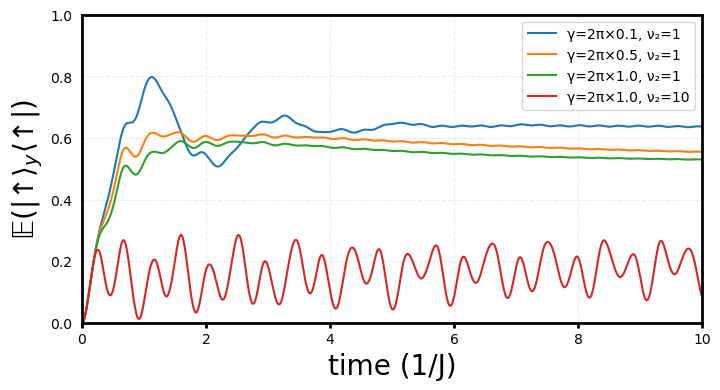

PyObject <matplotlib.legend.Legend object at 0x156babed0>

In [537]:
plt.plot(tout, sol, label="Œ≥=2œÄ√ó0.1, ŒΩ‚ÇÇ=1")
plt.plot(tout, sol2, label="Œ≥=2œÄ√ó0.5, ŒΩ‚ÇÇ=1")
plt.plot(tout, sol3, label="Œ≥=2œÄ√ó1.0, ŒΩ‚ÇÇ=1")
plt.plot(tout, sol4, label="Œ≥=2œÄ√ó1.0, ŒΩ‚ÇÇ=10")
plt.xlim(tout[1], tout[end])
plt.ylim(0, 1)
plt.xlabel("time (1/J)")
plt.ylabel(L"ùîº(|‚Üë‚ü©_y‚ü®‚Üë|)")
plt.legend()